In [84]:
#import Pandoc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [85]:
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

Python has numerous built-in and 3rd party modules for converting a JSON string into
a Python dictionary object. Here I’ll use the json module and its loads function invoked
on each line in the sample file I downloaded:

In [86]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [87]:
 records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [88]:
 records[0]['tz']

u'America/New_York'

In [90]:
# time_zones = [rec['tz'] for rec in records]

In [91]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [92]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [93]:
def get_counts(sequence):
	counts = {}
	for x in sequence:
		if x in counts:counts[x] += 1
	else:
		counts[x] = 1
	return counts

In [94]:
def get_counts2(sequence):
	counts = defaultdict(int) # values will initialize to 0
	for x in sequence:
		counts[x] += 1
	return counts

In [95]:
counts = get_counts(time_zones)

In [96]:
counts

{u'America/New_York': 1}

In [97]:
len(time_zones)

3440

In [98]:
def top_counts(count_dict, n=10):
	value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
	value_key_pairs.sort()
	return value_key_pairs[-n:]

In [99]:
top_counts(counts)

[(1, u'America/New_York')]

In [100]:
counts

{u'America/New_York': 1}

If you search the Python standard library, you may find the collections.Counter class,
which makes this task a lot easier:

In [101]:
from collections import Counter

In [102]:
counts = Counter(time_zones)

In [103]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

Counting Time Zones with pandas

In [104]:
from pandas import DataFrame, Series
import pandas as pd

In [105]:
frame = DataFrame(records)

In [106]:
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [107]:
tz_counts = frame['tz'].value_counts()

In [108]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

Then, we might want to make a plot of this data using plotting library, matplotlib. You
can do a bit of munging to fill in a substitute value for unknown and missing time zone
data in the records. The fillna function can replace missing (NA) values and unknown
(empty strings) values can be replaced by boolean array indexing:

In [109]:
clean_tz = frame['tz'].fillna('Missing')

In [110]:
clean_tz[clean_tz == ''] = 'Unknown'

In [111]:
tz_counts = clean_tz.value_counts()

In [112]:
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

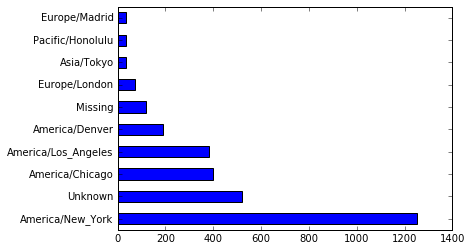

In [113]:
tz_counts[:10].plot(kind='barh', rot=0)

Parsing all of the interesting information in these “agent” strings may seem like a
daunting task. Luckily, once you have mastered Python’s built-in string functions and
regular expression capabilities, it is really not so bad. For example, we could split off
the first token in the string (corresponding roughly to the browser capability) and make
another summary of the user behavior:


In [114]:
results = Series([x.split()[0] for x in frame.a.dropna()])

In [115]:
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [116]:
results.value_counts()

Mozilla/5.0                                          2594
Mozilla/4.0                                           601
GoogleMaps/RochesterNY                                121
Opera/9.80                                             34
TEST_INTERNET_AGENT                                    24
GoogleProducer                                         21
Mozilla/6.0                                             5
BlackBerry8520/5.0.0.681                                4
Dalvik/1.4.0                                            3
BlackBerry8520/5.0.0.592                                3
Goldfire                                                2
Socialite/7766                                          2
BlackBerry9630/5.0.0.975                                2
Acoon                                                   2
BlackBerry9530/5.0.0.328                                1
Opera/9.64(Windows                                      1
LG-GW382f/V10d                                          1
BlackBerry9700

In [117]:
cframe = frame[frame.a.notnull()]

In [118]:
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [119]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

Then, you can group the data by its time zone column and this new list of operating
systems:


In [120]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [121]:
agg_counts = by_tz_os.size().unstack().fillna(0)

In [122]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [123]:
indexer = agg_counts.sum(1).argsort()

In [124]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [125]:
count_subset = agg_counts.take(indexer)[-10:]

In [126]:
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


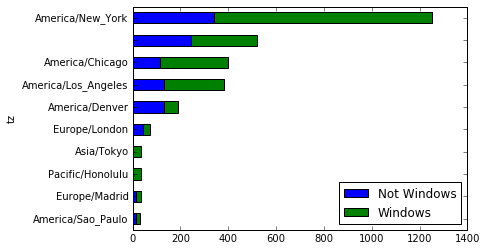

In [127]:
count_subset.plot (kind='barh', stacked=True)

In [128]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)

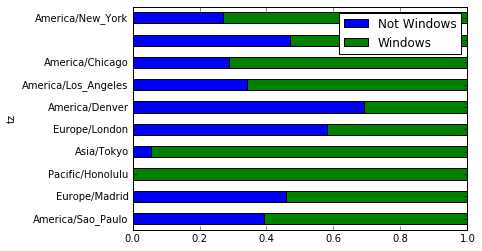

In [129]:
normed_subset.plot(kind='barh', stacked=True)

## MovieLens 1M data set

In [130]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ch02/movielens/users.dat', sep='::', header=None,names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ch02/movielens/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,names=mnames, engine='python')

In [131]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [132]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [133]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [134]:
data = pd.merge(pd.merge(ratings,users), movies)

In [135]:
data[:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [136]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [137]:
# Issue with the following command
## mean_ratings = data.pivot_table( 'rating', rows='title', aggfunc='mean')

In [138]:
mean_ratings = data.pivot_table('rating', index='title',columns='gender', aggfunc='mean')

In [139]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [140]:
ratings_by_title = data.groupby('title').size()

In [141]:
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [142]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [143]:
active_titles

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)',
       u'101 Dalmatians (1961)', u'101 Dalmatians (1996)',
       u'12 Angry Men (1957)', u'13th Warrior, The (1999)',
       u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)',
       u'2001: A Space Odyssey (1968)', u'2010 (1984)',
       ...
       u'X-Men (2000)', u'Year of Living Dangerously (1982)',
       u'Yellow Submarine (1968)', u'You've Got Mail (1998)',
       u'Young Frankenstein (1974)', u'Young Guns (1988)',
       u'Young Guns II (1990)', u'Young Sherlock Holmes (1985)',
       u'Zero Effect (1998)', u'eXistenZ (1999)'],
      dtype='object', name=u'title', length=1216)

In [144]:
mean_ratings = mean_ratings.ix[active_titles]

In [145]:
mean_ratings[:5]


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [146]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [147]:
top_female_ratings[:5]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415


In [148]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [149]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [150]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [151]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [152]:
# standard deviaton of rating grouped by title 
rating_std_by_title = data.groupby('title')['rating'].std()

In [153]:
# filter to only include active titles 
rating_std_by_title = rating_std_by_title.ix[active_titles]

In [154]:
# Order by descending differences 
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## US Baby Names 1880-2010

The United States Social Security Administration (SSA) has made available data on the
frequency of baby names from 1880 through the present. Hadley Wickham, an author
of several popular R packages, has often made use of this data set in illustrating data
manipulation in R.

In [156]:
!head -n 10 'ch02/names/yob1880.txt'

## as you can see the file is delimeted by a comma

In [158]:
names1880 = pd.read_csv('ch02/names/yob1880.txt', names = ['name', 'sex', 'births'])

In [160]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


These files only contain names with at least 5 occurrences in each year, so for simplicity’s
sake we can use the sum of the births column by sex as the total number of births
in that year:

In [161]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

Since the data set is split into files by year, one of the first things to do is to assemble
all of the data into a single DataFrame and further to add a year field. This is easy to
do using pandas.concat:

In [169]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []

columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    # add year to data frame
    frame['year'] = year 
    pieces.append(frame)
    
    # Concatenate everything into a single DataFrame
    names = pd.concat(pieces, ignore_index=True)

There are a couple things to note here. First, remember that concat glues the DataFrame
objects together row-wise by default. Secondly, you have to pass ignore_index=True
because we’re not interested in preserving the original row numbers returned from
read_csv. So we now have a very large DataFrame containing all of the names data:
Now the names DataFrame looks like:

In [170]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


With this data in hand, we can already start aggregating the data at the year and sex
level using groupby or pivot_table, see Figure 2-4:

In [173]:
#total_births = names.pivot_table('births', rows='year', cols='sex', aggfunc=sum)
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)

In [174]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


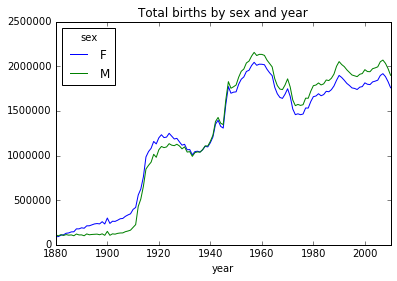

In [175]:
total_births.plot(title='Total births by sex and year')

Next, let’s insert a column prop with the fraction of babies given each name relative to
the total number of births. A prop value of 0.02 would indicate that 2 out of every 100
babies was given a particular name. Thus, we group the data by year and sex, then add
the new column to each group:

In [176]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    
    group['prop'] = births / births.sum()
    
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)

Remember that because births is of integer type, we have to cast either
the numerator or denominator to floating point to compute a fraction
(unless you are using Python 3!).

The resulting complete data set now has the following columns:

In [177]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


When performing a group operation like this, it's often valuable to do a sanity check,
like verifying that the prop column sums to 1 within all the groups. Since this is floating
point data, use np.allclose to check that the group sums are sufficiently close to (but
perhaps not exactly equal to) 1:

In [178]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

Now that this is done, I’m going to extract a subset of the data to facilitate further
analysis: the top 1000 names for each sex/year combination. This is yet another group
operation:

In [193]:
## Approach 1 
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [194]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [195]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [191]:
## Approach 2 
## If you prefer a do-it-yourself approach, you could also do:
pieces = [] 
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [192]:
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


We’ll use this Top 1,000 data set in the following investigations into the data.

# Analyzing Naming Trends

With the full data set and Top 1,000 data set in hand, we can start analyzing various
naming trends of interest. Splitting the Top 1,000 names into the boy and girl portions
is easy to do first:

In [197]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex != 'M']

Simple time series, like the number of Johns or Marys for each year can be plotted but
require a bit of munging to be a bit more useful. Let’s form a pivot table of the total
number of births by year and name

In [385]: total_births = top1000.pivot_table('births', rows='year', cols='name',
.....: aggfunc=sum)
Now, this can be plotted for a handful of names using DataFrame’s plot method:

In [202]:
total_births = names.pivot_table('births', index='year',columns='name', aggfunc=sum)
total_births.head()

name,Aaban,Aabid,Aabriella,Aadam,Aadan,Aadarsh,Aaden,Aadesh,Aadhav,Aadhavan,...,Zyrus,Zysean,Zyshaun,Zyshawn,Zyshon,Zyshonne,Zytavious,Zyvion,Zyyanna,Zzyzx
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
subset = total_births[['Conor', 'Ciaran',]]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12ef00d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12ef74e10>], dtype=object)

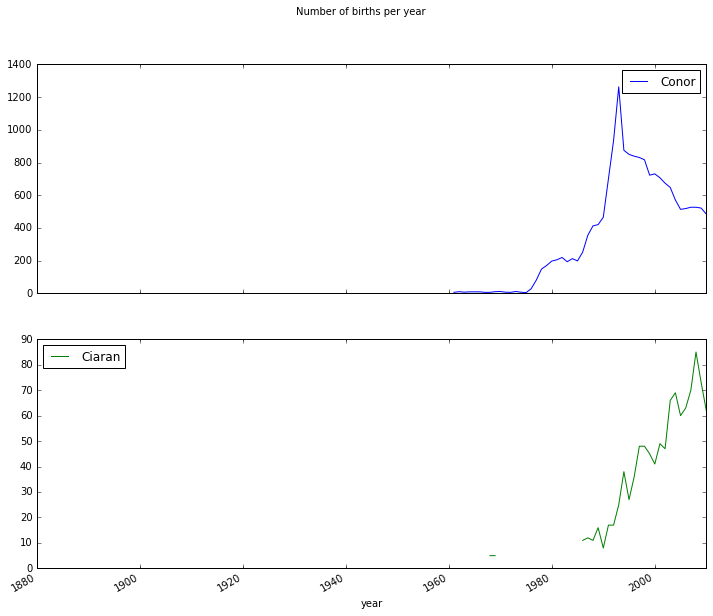

In [216]:
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Number of births per year')

See Figure 2-5 for the result. On looking at this, you might conclude that these names
have grown out of favor with the American population. But the story is actually more
complicated than that, as will be explored in the next section.

# Measuring the increase in naming diversity

One explanation for the decrease in plots above is that fewer parents are choosing
common names for their children. This hypothesis can be explored and confirmed in
the data. One measure is the proportion of births represented by the top 1000 most
popular names, which I aggregate and plot by year and sex:

In [217]:
table = top1000.pivot_table('prop', index='year',columns='sex', aggfunc=sum)


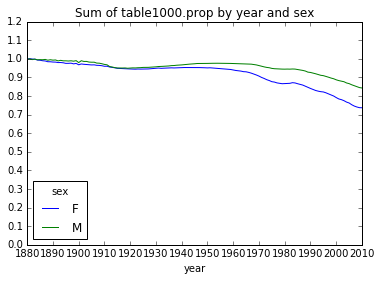

In [219]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))